# PREVENTING GENOCIDE
#### USING DATA SCIENCE TO IDENTIFY EARLY INDICATORS OF FUTURE STATE LED MASS KILLINGS

Mark Cotton / DS-SEA-06 / 2017-05-15

1. Background
==========

On April 6, 1994, Rwandan President Juvenal Habyarimana, a Hutu, was
shot down above Kigali airport. In the following 100 days, between
800,000 to 1,000,000 (perhaps even 2 M) Tutsi and moderate Hutus were
slaughter were killed by fellow Rwandans, with violence being encouraged
by the state. This averaged to 6 men, women and children were murdered
every minute of every hour of every day for 3 months<sup>1</sup>.

Since the Holocaust during World War II, there have been numerous mass
killings classified as genocide, from atrocities in Cambodia to Rwanda
to Bangladesh to name a few, resulting in the slaughter of millions of
people. According to GenocideWatch.org, genocides and other mass murders
killed more people in the twentieth century than all the wars combined.

When the killings began in Rwanda, the international community responded
inadequately and was not able to prevent the hundreds of thousands of
deaths that followed. Did the world see this catastrophe coming? Could
this all have been prevent or at least could the damage have been
minimized? The biggest question is this: how do we prevent history from
repeating itself again?

What can be done to prevent genocide? From a report by the Genocide
Prevention Task Force from the United States Institute of Peace,

> *“The first major element of a comprehensive system to prevent
> genocide and mass atrocities is a reliable process for accessing risks
> and generating early warning of potential atrocities... Effective
> early warning does not guarantee successful prevention, but if warning
> is absent, slow, inaccurate, or indistinguishable from the 'noise' of
> regular reporting, failure is virtually guaranteed.<sup>2</sup>”*

What follows, per the Early Warning Project, is that genocide is nearly
always carried out by a country’s own police and military forces,
requiring external (international) intervention. To make predictions
before a country has fallen in to a large-scale genocide, the marker to
watch for is state-led mass killings. State-led mass killings occur when
a country uses its own forces to kill over 1000 non-combatant civilians
in a 12-month time period (in a country of over 500,000).

2. Problem statement and hypothesis
================================

Identifying early indicators that mass killings are going to occur will
allow a better opportunity for prevention.

Can data science machine learning principles be used to create a model
to predict countries with a high likelihood of having a new state-led
mass killing occur before the killings occur? The EWP already has
created model to make these predictions. My hypothesis is that from
within this data, certain combinations of features will be highly
indicative of new mass killings occurring. I predict that lingual
fractionalization, ethnic fractionalization, GDP, trade openness,
country age, availability of natural resources, and history of mass
killings will have strong correlations with new mass killings occurring.
The model created will be in the form a logistic regression, predicting
a 1 or 0 for new mass killings occurring in the following year, with
some confidence percentage.

3. Description of your data set and how it was obtained
====================================================

The data set used for this report is all directly pulled from a Github repo (available here: <https://github.com/EarlyWarningProject/2015-Statistical-Risk-Assessment>), where the Early Warning Project (EWP) has aggregated data from multiple sources. The EWP runs statistical risk assessment with the goal
of preventing mass atrocities. The data from publicly available sources and was cleaned by EWP. This is a time series dataset spanning 178 countries from 1945-2014. This report is using the pre-processed dataset which includes 9330 observations (rows) with 276 variables (columns). The file “EWP Data Dictionary 20140909.pdf” describes the sources and variables. The information below is copied from that document outlining the sources:

-   mkl = Early Warning Project’s Episodes of State-Led Mass Killing
    Dataset

-   wdi = World Bank’s World Development Indicators (via R
    package ’WDI’)

-   mev = Center for Systemic Peace’s Major Episodes of Political
    Violence (<http://www.systemicpeace.org/inscrdata.html>)

-   pol = Polity IV (<http://www.systemicpeace.org/inscrdata.html>)

-   imr = U.S. Bureau of the Census, International Division (via PITF)

-   cmm = Center for Systemic Peace’s List of Coups d’Etat
    (<http://www.systemicpeace.org/inscrdata.html>)

-   cpt = Powell and Thyne’s Coups d’Etat, 1950 to Present
    (<http://www.uky.edu/~clthyn2/coup_data/home.htm>)

-   cou = An amalgamation of cmm and cpt data

-   pit = PITF Problem Set (i.e., episodes of instability)
    (<http://www.systemicpeace.org/inscrdata.html>)

-   dis = Center for Systemic Peace’s Discrimination Data Set (via PITF)

-   imf = International Monetary Fund’s World Economic Outlook Report
    (<http://www.imf.org/external/pubs/ft/weo/2014/01/weodata/index.aspx>)

-   elf = Anderson’s Ethnic Fractionalization Data
    (<http://www.anderson.ucla.edu/faculty_pages/romain.wacziarg/papersum.html>)

-   hum = Farris et al.’s Latent Human Rights Protection Scores
    (<http://humanrightsscores.org/>)

-   fiw = Freedom House’s Freedom in the World Data Set
    (<https://freedomhouse.org/report-types/freedom-world#.VA7Sufk7u-M>)

-   aut = Geddes, Wright, and Frantz’s Authoritarian Regimes Dataset
    (<http://sites.psu.edu/dictators/>)

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Import files, with the column headers cleaned so that '.' was replaced with '_'
url = './data/ewp.statrisk.data.transformed.MC.csv'
data = pd.read_csv(url)

In [150]:
data.head()

,country,sftgcode,year,yrborn,yrdied,reg_eap,reg_afr,reg_eur,reg_mna,reg_sca,...,dis_l4pop_ln,imr_normed_ln,mev_regac,mev_regac_ln,mev_civtotc,mev_civtot_ln,imf_gdppcgrow,gdppcgrow,gdppcgrow_sr,slowgrowth
0,Afghanistan,AFG,1945,1919,9999,0,0,0,0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1946,1919,9999,0,0,0,0,1,...,0.0,NaN,8.0,2.197225,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1947,1919,9999,0,0,0,0,1,...,0.0,NaN,20.0,3.044522,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1948,1919,9999,0,0,0,0,1,...,0.0,NaN,18.0,2.944439,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1949,1919,9999,0,0,0,0,1,...,0.0,NaN,14.0,2.708050,0.0,0.0,NaN,NaN,NaN,NaN


4. Description of any pre-processing steps you took
================================================



In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Columns: 243 entries, country to slowgrowth
dtypes: float64(218), int64(21), object(4)
memory usage: 17.3+ MB


In [152]:
data.isnull().sum().sum()

197200L

Due to the large number of features in these data, additional pre-processing is performed as part of step 6 for feature selection.

5. What you learned from exploring the data, including visualizations
==================================================================

Some holes in data – information for history of country starts at 0
generally (ie, mkl\_ever) if the country is born in the dataset.

In [153]:
# How many new state led mass killings occurred between 1945 and 2014?
data[data.mkl_start == 1].mkl_start.count()

116

In [154]:
# Primary response is mkl-start, indicating a mass killing started that year and mkl-ongoing tracks ongoing mass killings
df = data[data.mkl_ongoing == 1].groupby('year')['mkl_ongoing', 'mkl_start'].sum()
df.head()

,mkl_ongoing,mkl_start
year,,
1945,7,5
1946,8,1
1947,8,1
1948,12,5
1949,14,2


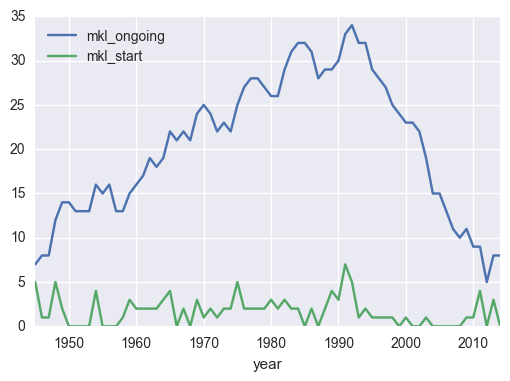

In [155]:
df.plot()

In [156]:
df.max()

mkl_ongoing    34
mkl_start       7
dtype: int64

In [157]:
# Year with most mass killings started
df[df == df.max()].mkl_start.dropna()

year
1991    7.0
Name: mkl_start, dtype: float64

In [158]:
# Year with most mass killings ongoing
df[df == df.max()].mkl_ongoing.dropna()

year
1992    34.0
Name: mkl_ongoing, dtype: float64

In [159]:
dft = data.groupby('country').sum()
total_countries_no_mkl = dft[dft['mkl_ever'] == 0].mkl_ever.value_counts()[0]
total_countries = dft.mkl_ever.count()
print 'Total countries with no state led mass killings since 1945: %s' % total_countries_no_mkl
print 'Total countries: %s' % total_countries

Total countries with no state led mass killings since 1945: 106
Total countries: 178


## Null Model

In [160]:
# What is the null model, that is the number of new mkl/year?
val = data.mkl_start.value_counts()
print val
null_accuracy = val[1]*1.0/val.sum()

print
print "The null accuracy that any country in a given year will have a new MKL start is: %s" % null_accuracy
print

0    9214
1     116
Name: mkl_start, dtype: int64

The null accuracy that any country in a given year will have a new MKL start is: 0.0124330117899



In [161]:
# Since data starting being collected, which varies from country to country and starts no sooner than 1945,
# which countries have had the most mass killings start?
# Note, this will not include instance where a country first appeared with ongoing mkl but no new mkl
# (ie, in 1945, there were 7 ongoing mass killings and 5 started)
# Also, countries which changed names, such as East Germany, West Germany and Germany, are counted individually here.
data.groupby('country').mkl_start.sum().sort_values(ascending=False).head(20)

country
Indonesia         5
Iraq              4
Sudan             4
Congo-Kinshasa    4
Nigeria           4
Afghanistan       3
Sri Lanka         3
China             3
Uganda            3
Ethiopia          3
Rwanda            3
Philippines       3
Syria             2
Laos              2
India             2
Liberia           2
Nicaragua         2
Haiti             2
Romania           2
Iran              2
Name: mkl_start, dtype: int64

## What features are common between these countries?
1. Birth year of country?
1. GDP?
1. Fractionalization?:
 *  Lingual (elf_language)
 *  Religious
 *  Ethnic
1. Collapse of democratic institutions?
1. Violence associated with regime transition?
1. Democracy score? (pol_democ)
1. Large supply of natural resources? Oil, gold, diamonds, etc.
 * Not sure oil is in the data or specific types of minerals.
 * Mineral depletion (wdi_minerals)
 * Forest depletion (wdi_forest)
 * Energy depletion (wdi_energy)
1. Trade openness (wdi_trade)
1. Context in which state-led mass killing episode began (mkl.type)
 * none
 * civil war
 * uprising
 * repression
 * other

In [162]:
# Linguistic fractionalization index
data.groupby('country').elf_language.max().sort_values(ascending = False).head(20)

country
Uganda                      0.92
Togo                        0.90
Tanzania                    0.90
Liberia                     0.90
Kenya                       0.89
Cameroon                    0.89
Congo-Kinshasa              0.87
South Africa                0.87
Zambia                      0.87
Chad                        0.86
Nigeria                     0.85
Mali                        0.84
Philippines                 0.84
Central African Republic    0.83
Ethiopia                    0.81
India                       0.81
Mozambique                  0.81
Gambia                      0.81
Guinea-Bissau               0.81
Benin                       0.79
Name: elf_language, dtype: float64

In [163]:
# Trade openness, lower is more open

print data.groupby('country').wdi_trade.mean().sort_values(ascending = True).head(10)
print data.groupby('country').wdi_trade.mean().sort_values(ascending = False).head(10)

country
Myanmar          13.875214
United States    18.632225
Brazil           18.649237
Argentina        19.761625
India            20.931200
Japan            22.631970
Bangladesh       27.135295
Sudan            28.096628
Ethiopia         30.323540
Turkey           30.324656
Name: wdi_trade, dtype: float64
country
Singapore               333.474066
Equatorial Guinea       221.878705
Bahrain                 162.914169
Guyana                  161.468853
Panama                  153.635176
Swaziland               147.663333
Lesotho                 142.375337
Slovakia                136.596899
United Arab Emirates    134.088522
Malaysia                132.656492
Name: wdi_trade, dtype: float64


In [164]:
# Trade openness, lower is more open
dft = data[data.country == 'Indonesia']
#print dft.head()
print "Indonesia trade openness:"
print "Max: %s" % dft['wdi_trade'].max()
print "Min: %s" % dft['wdi_trade'].min()
print "Mean: %s" %dft['wdi_trade'].mean()
print
print "Average trade openness for all countries all years: %s" % data.wdi_trade.mean()
print "Max for all countries all years: %s" % data.wdi_trade.max()
print "Min for all countries all years: %s" % data.wdi_trade.min()

Indonesia trade openness:
Max: 96.18619424
Min: 10.92290909
Mean: 46.0338016411

Average trade openness for all countries all years: 71.3862089985
Max for all countries all years: 531.7374352
Min for all countries all years: 0.308802944


In [165]:
dft = data.corr().mkl_start.sort_values()
print dft.head(10)
print dft.tail(10)

pol_durable_ln   -0.114954
pol_polity       -0.098278
pol_democ        -0.096686
pol_polcomp      -0.095495
pol_exconst      -0.093020
pol_xconst       -0.093020
wdi_gdppcgrow    -0.092581
pol_parcomp      -0.091409
pol_exrec        -0.091135
pol_xrcomp       -0.090424
Name: mkl_start, dtype: float64
pit_any_ongoing     0.183674
pit_gen_deathmag    0.188718
pit_rev_onset       0.258489
mkl_ongoing         0.263942
pit_eth_onset       0.278938
pit_any_onset       0.328419
pit_cwar_onset      0.349247
pit_gen_onset       0.360816
mkl_type            0.850716
mkl_start           1.000000
Name: mkl_start, dtype: float64


6. How you chose which features to use in your analysis
==========================================================

Features selected a priori. The features selected make sense and generally match up with the correlations from the results above. Would like to use additional features but want to refine model to be more than 13% accurate with recommended features first. (Don’t want to optimize a broken model – want to find out what is broken first and fix that.)

The EWP uses three different models to predict new mass killings. For the “general” model, Random Forests is used with “no feature selection involved. These models were specified a priori to represent existing theories on the causes of mass killings, so this \[R\] script is only used to demonstrate that the resulting models and the average of forecasts from them do have real predictive power.” Below is the description of the specific features selected ahead a priori:

-   mkl\_start: Onset of any episodes of state-led mass killing

-   reg\_afr: US Dept State region: Sub-Saharan Africa

-   reg\_eap: US Dept State region: East Asia and Pacific

-   reg\_eur: US Dept State region: Europe and Eurasia

-   reg\_mna: US Dept State region: Middle East and North Africa

-   reg\_sca: US Dept State region: South and Central Asia

-   reg\_amr: US Dept State region: Americas

-   mkl\_ongoing; Any ongoing episodes of state-led mass killing

-   mkl\_ever: Any state-led mass killing since WWII (cumulative)

-   countryage\_ln: Country age, logged

-   wdi\_popsize\_ln: Population size, logged

-   imr\_normed\_ln: Infant mortality rate relative to annual global
    median, logged

-   gdppcgrow\_sr: Annual % change in GDP per capita, meld of IMF and
    WDI, square root

-   wdi\_trade\_ln: Trade openness, logged

-   ios\_iccpr1: ICCPR 1st Optional Protocol signatory

-   postcw: Post-Cold War period (year ≥ 1991)

-   pol\_cat\_fl1: Autocracy (Fearon and Laitin)

-   pol\_cat\_fl2: Anocracy (Fearon and Laitin)

-   pol\_cat\_fl3: Democracy (Fearon and Laitin)

-   pol\_cat\_fl7: Other (Fearon and Laitin)

-   pol\_durable\_ln: Regime duration, logged (Polity)

-   dis\_l4pop\_ln: Percent of population subjected to state-led
    discrimination, logged

-   elf\_ethnicc1: Ethnic fractionalization: low

-   elf\_ethnicc2: Ethnic fractionalization: medium

    Note: Final category not needed: elf\_ethnicc3: ethnic
    fractionalization: high

-   elf\_ethnicc9: Ethnic fractionalization: missing

-   elc\_eleth1: Salient elite ethnicity: majority rule

-   elc\_eleth2: Salient elite ethnicity: minority rule

    Note: Final category not needed: elc.elethc : Salient elite
    ethnicity (yes/no)

-   elc\_eliti: Ruling elites espouse an exclusionary ideology

-   cou\_tries5d: Any coup attempts in past 5 years ((t-4) to (t))

-   pit\_sftpuhvl2\_10\_ln: Sum of max annual magnitudes of PITF
    (Political Instability Task Force) instability other than genocide
    from past 10 yrs ((t-9) to (t)), logged

-   mev\_regac\_ln: Scalar measure of armed conflict in geographic
    region, logged

-   mev\_civtot\_ln: Scale of violent civil conflict, logged


In [176]:
train = data[['mkl_start','mkl_start_1','reg_afr','reg_eap','reg_eur','reg_mna','reg_sca','reg_amr','mkl_ongoing',\
             'mkl_ever','countryage_ln','wdi_popsize_ln','imr_normed_ln','gdppcgrow_sr','wdi_trade_ln',\
             'ios_iccpr1','postcw','pol_cat_fl1','pol_cat_fl2','pol_cat_fl3','pol_cat_fl7','pol_durable_ln',\
             'dis_l4pop_ln','elf_ethnicc1','elf_ethnicc2','elf_ethnicc9','elc_eleth1','elc_eleth2','elc_eliti',\
             'cou_tries5d','pit_sftpuhvl2_10_ln','mev_regac_ln','mev_civtot_ln']]

info = data[['country','year']]
# Don't need country and year for modeling, so save as separate dataframe
train_info = result = pd.concat([info, train], axis=1)
train_info.head(10)

,country,year,mkl_start,mkl_start_1,reg_afr,reg_eap,reg_eur,reg_mna,reg_sca,reg_amr,...,elf_ethnicc1,elf_ethnicc2,elf_ethnicc9,elc_eleth1,elc_eleth2,elc_eliti,cou_tries5d,pit_sftpuhvl2_10_ln,mev_regac_ln,mev_civtot_ln
0,Afghanistan,1945,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1946,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2.197225,0.0
2,Afghanistan,1947,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,3.044522,0.0
3,Afghanistan,1948,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2.944439,0.0
4,Afghanistan,1949,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2.708050,0.0
5,Afghanistan,1950,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,0.0,NaN,3.218876,0.0
6,Afghanistan,1951,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,0.0,NaN,2.833213,0.0
7,Afghanistan,1952,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,0.0,NaN,2.564949,0.0
8,Afghanistan,1953,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,0.0,NaN,2.639057,0.0
9,Afghanistan,1954,0,0.0,0,0,0,0,1,0,...,0,0,0,NaN,NaN,NaN,0.0,NaN,2.302585,0.0


From the features listed above, there were 14563 nulls, with 2669 nulls
in wdi\_trade\_ln, 2295 in gdppcgrow\_sr, 1685 in wdi\_popsize\_ln.

In [167]:
print '\nTotal nulls in filtered data: %s' % train.isnull().sum().sum()
print
print train.isnull().sum()


Total nulls in filtered data: 14563

mkl_start                 0
reg_afr                   0
reg_eap                   0
reg_eur                   0
reg_mna                   0
reg_sca                   0
reg_amr                   0
mkl_ongoing               0
mkl_ever                  0
countryage_ln             0
wdi_popsize_ln         1685
imr_normed_ln           966
gdppcgrow_sr           2295
wdi_trade_ln           2669
ios_iccpr1              994
postcw                    0
pol_cat_fl1             144
pol_cat_fl2             144
pol_cat_fl3             144
pol_cat_fl7             144
pol_durable_ln          175
dis_l4pop_ln              0
elf_ethnicc1              0
elf_ethnicc2              0
elf_ethnicc9              0
elc_eleth1              934
elc_eleth2              934
elc_eliti               934
cou_tries5d             360
pit_sftpuhvl2_10_ln    1507
mev_regac_ln            267
mev_civtot_ln           267
dtype: int64


From the features listed above, there were 14563 nulls, with 2669 nulls in wdi\_trade\_ln, 2295 in gdppcgrow\_sr, 1685 in wdi\_popsize\_ln.

To attempt to clean this data, nulls are replaced with the average values.

**Note:**  The issue with this process of imputing missing data is that the mean value may be very misrepresentative for a given country. For example, Yugoslavia has no population size information for any years – is the global mean going to be a fare estimate? This country turned in to Bosnia and Herzegovina, Croatia, Federal Republic of Yugoslavia (later Serbia and Montenegro), Macedonia, and Slovenia. Yugoslavia had mass killings start in 1945 and 1991 and Bosnia and Herzegovina in 1992. Even though mass killings happened in Yugoslavia before the country split in 1991, none of these countries have “history” of mass killings (mkl\_ever = 0). (Bosnia and Herzegovina had mass killings start in the first year and therefore have mkl\_ever=1.) Most striking to me from this data is that Yugoslavia (mkl\_ever = 1) split in to multiple countries including the Federal Republic of Yugoslavia (mkl\_ever = 0) which later became Serbia and Montenegro (mkl\_ever = 1) and then became the separate countries Serbia (mkl\_ever = 0) and Montenegro (mkl\_ever = 0). *Both the Federal Republic of Yugoslavia and (Serbia and Montenegro) never had
mkl\_start=0 and yet Serbia and Montenegro have history of mass killings.*

In [168]:
# # Whatcha gunna do with all those nulls?
# # Ideally, model values for each country.
# # ie, use KNN or DBSCAN clustering to group countries for every year
# # Start by using mean values...
# train_cleaned = train.fillna(train.mean())
# train_cleaned.isnull().sum()

In [169]:
# Whatcha gunna do with all those nulls?
# Ideally, model values for each country.
# ie, use KNN or DBSCAN clustering to group countries for every year
# Drop null cells.
train_cleaned = train.dropna()
print train_cleaned.isnull().sum()

mkl_start              0
reg_afr                0
reg_eap                0
reg_eur                0
reg_mna                0
reg_sca                0
reg_amr                0
mkl_ongoing            0
mkl_ever               0
countryage_ln          0
wdi_popsize_ln         0
imr_normed_ln          0
gdppcgrow_sr           0
wdi_trade_ln           0
ios_iccpr1             0
postcw                 0
pol_cat_fl1            0
pol_cat_fl2            0
pol_cat_fl3            0
pol_cat_fl7            0
pol_durable_ln         0
dis_l4pop_ln           0
elf_ethnicc1           0
elf_ethnicc2           0
elf_ethnicc9           0
elc_eleth1             0
elc_eleth2             0
elc_eliti              0
cou_tries5d            0
pit_sftpuhvl2_10_ln    0
mev_regac_ln           0
mev_civtot_ln          0
dtype: int64


In [ ]:
train_cleaned.mkl_start.value_counts()

In [170]:
print train_cleaned.shape
train_cleaned

(6196, 32)


,mkl_start,reg_afr,reg_eap,reg_eur,reg_mna,reg_sca,reg_amr,mkl_ongoing,mkl_ever,countryage_ln,...,elf_ethnicc1,elf_ethnicc2,elf_ethnicc9,elc_eleth1,elc_eleth2,elc_eliti,cou_tries5d,pit_sftpuhvl2_10_ln,mev_regac_ln,mev_civtot_ln
58,0,0,0,0,0,1,0,0,1,4.442651,...,0,0,0,0.0,0.0,0.0,1.0,3.713572,2.995732,1.386294
59,0,0,0,0,0,1,0,0,1,4.454347,...,0,0,0,0.0,0.0,0.0,1.0,3.713572,3.178054,1.386294
60,0,0,0,0,0,1,0,0,1,4.465908,...,0,0,0,0.0,0.0,0.0,1.0,3.713572,3.218876,1.386294
61,0,0,0,0,0,1,0,0,1,4.477337,...,0,0,0,0.0,0.0,0.0,1.0,3.688879,3.218876,1.386294
62,0,0,0,0,0,1,0,0,1,4.488636,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,3.135494,1.386294
63,0,0,0,0,0,1,0,0,1,4.499810,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,3.135494,1.386294
64,0,0,0,0,0,1,0,0,1,4.510860,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,3.178054,1.386294
65,0,0,0,0,0,1,0,0,1,4.521789,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,3.044522,1.386294
66,0,0,0,0,0,1,0,0,1,4.532599,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,2.944439,1.386294
67,0,0,0,0,0,1,0,0,1,4.543295,...,0,0,0,0.0,0.0,0.0,0.0,3.688879,2.944439,1.386294


#### The following cells are attempting to create a new column for if a mass killing will start in the following year for that country

In [ ]:
def buildLeadingFeatures(s,lead=2,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create leading Series
            for l in range(1,lead+1):
                new_dict['%s_lead%d' %(col_name,l)]=s[col_name].shift(-1)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lead+1)
        res=pd.concat([s.shift(-i) for i in the_range],axis=1)
        res.columns=['lead_%d' %i for i in the_range]
    else:
        print 'Only works for DataFrame or Series'
        return None
    if dropna:
        return res.dropna()
    else:
        return res

#s2=pd.DataFrame({'a':[5,4,3,2,1], 'b':[50,40,30,20,10]},index=[1,2,3,4,5])
#print s2
#res2=buildLeadingFeatures(s2,lead=1,dropna=False)
#res2

In [175]:
dft = pd.concat([info,train_cleaned],axis=1)
columns=['mkl_start','mkl_start_next_year']
dft2 = pd.DataFrame(columns=columns)

# Create new dataframe sorted by country and create new column for mkl_start_next_year
for nation in dft.groupby('country').country.head(1):
    # Create response for mkl_start_next_year for each country
    # This also drops last observation for country, as mkl_start_next_year is null
    temp = buildLeadingFeatures(dft[dft.country == nation].mkl_start,lead=1,dropna=False)
    temp.rename(columns={"lead_0": "mkl_start", "lead_1": "mkl_start_next_year"}, inplace = True)
    # Append dataframe for country into running 
    dft2 = dft2.append(temp,ignore_index=False)

dft3 = pd.concat([dft,dft2.mkl_start_next_year],axis=1)
# Verify results by making sure a country with mkl_start in its first year 
# does not result in mkl_start_next_year = 1 for the previous row.
#dft3[['country','mkl_start','mkl_start_next_year']][190:201]
#for nation in dft.groupby('country').country.head(1):
dft3[['country','mkl_start','mkl_start_next_year']].groupby('country').head(1)

#dft3[190:201]

,country,mkl_start,mkl_start_next_year
0,Afghanistan,NaN,NaN
70,Albania,NaN,NaN
140,Algeria,NaN,0.0
193,Angola,NaN,NaN
233,Argentina,NaN,NaN
303,Armenia,NaN,0.0
327,Australia,NaN,NaN
397,Austria,NaN,NaN
467,Azerbaijan,NaN,0.0
491,Bahamas,NaN,NaN


In [ ]:
train_cleaned = dft3
print train_cleaned.shape
print
print "Nulls counted in the new column: %s" % train_cleaned.isnull().mkl_start_next_year.sum()

print train_cleaned[train_cleaned.mkl_start_next_year.isnull() == True].head()
# Drop rows where we do not have data on if a mkl started the next year, ie last year reported for country
train_cleaned = train_cleaned.dropna()
print "Nulls after cleaning new column: %s" % train_cleaned.isnull().mkl_start_next_year.sum()

print train_cleaned.shape
train_cleaned[188:198]

In [ ]:
y_count = train_cleaned[train_cleaned.mkl_start_next_year == 1].mkl_start_next_year.sum()
print 'The number of observations where the country would have a \
mass killing start in the following year is: %s' % int(y_count)

In [ ]:
# Correlation heatmap for cleaned data
dft = train_cleaned.corr()
# Print correlation values against mkl_start
print dft.mkl_start_next_year.drop(dft.index[0]).sort_values()
# Observations:
#    Negative corr (<-4.5%)
#        pol_durable_ln        -0.060688
#            Regime duration (makes sense, although surprised to see strongest neg corr here)
#        pol_cat_fl3           -0.059782
#            Democracy political category
#        wdi_trade_ln          -0.048357
#            Trade openness, logged
#    Positive corr (>6%)
#        pol_cat_fl7            0.060388
#             Other political cat (not dem, autocracy, or anocracy) (suprise: anocracy )
#        imr_normed_ln          0.061869
#            Infant mortality rate, logged
#        mev_civtot_ln          0.068543
#            Scale of violent civil conflict, logged
        
sns.heatmap(dft)

7. Details of modeling process, including how models were selected and validated
===========================================================================================

Logistic regression and RandomForests are used along with the pre-defined features. Confusion matrix helps understand and refine the classification results – want to capture more true positives to make sure my model can catch all mkl\_starts.

## Logistic Regression

In [ ]:
# 1. Define X and y
feature_cols = ['reg_afr','reg_eap','reg_eur','reg_mna','reg_sca','reg_amr','mkl_ongoing',\
             'mkl_ever','countryage_ln','wdi_popsize_ln','imr_normed_ln','gdppcgrow_sr','wdi_trade_ln',\
             'ios_iccpr1','postcw','pol_cat_fl1','pol_cat_fl2','pol_cat_fl3','pol_cat_fl7','pol_durable_ln',\
             'dis_l4pop_ln','elf_ethnicc1','elf_ethnicc2','elf_ethnicc9','elc_eleth1','elc_eleth2','elc_eliti',\
             'cou_tries5d','pit_sftpuhvl2_10_ln','mev_regac_ln','mev_civtot_ln']
X = train_cleaned[feature_cols]
y = train_cleaned.mkl_start_next_year
#y = train_cleaned.mkl_start

print y.value_counts()
X.head()

In [ ]:
# 2. Choose model and import
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# GridSearchCV can be used somehow to get the best C value to use.
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
       estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001),
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

# Find best C value using GridSearchCV
clf.fit(X,y)
clf.best_params_['C']

In [ ]:
# 3. Instantiate
# Increasing C>1 does not increase sensitivity but does increase FPs
# Best C value from above is incorrect and leads to 0 TP
#logreg = LogisticRegression(C=clf.best_params_['C'])
# Manually found C value with max TP and min FP
# Manually played with tol and could not improve sensitivity
logreg = LogisticRegression(C=clf.best_params_['C'])

In [ ]:
# 4. Fit model, 5. Predict, 6. Evaluate
from sklearn.cross_validation import cross_val_score
from sklearn import metrics, cross_validation
# 10-fold cross-validation used to check model accuracy and keeps predicted results
predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10)
print metrics.accuracy_score(y, predicted)
pred = pd.DataFrame(predicted, columns=['Predicted_mkl_start'])
pred.head()

In [ ]:
# The original dataset has 116 mkl_start. Prediction from model: 18
# Note: When using y = mkl_start_next_year, predictions from model = 0. Not sure why.
pred[pred.Predicted_mkl_start == 1].count()

In [ ]:
#data_pred = pd.concat([info, y, pred, pred_proba.Predicted_proba_mkl_start, X], axis=1)
data_pred = pd.concat([info, y, pred, X], axis=1)
print data_pred.shape
data_pred.head()

In [ ]:
# Show results using confusion matrix
y_true = y
y_pred = data_pred.Predicted_mkl_start
df_confusion = pd.crosstab(y_true, y_pred)
df_confusion

In [ ]:
# Sensitivity: When actual value is positive, how often is prediction correct?
# AKA “True Positive Rate” or “Recall”
# TP / (all actual positives)
# If this value is close to 100%, model is near perfect
logreg_sens = (df_confusion[1:2].unstack().sum()-df_confusion[0][1]*1.0)/df_confusion[1:2].unstack().sum()
logreg_sens

## Decision Tree

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz


def decision_tree_model(X,y,feature_cols,depth,verbose=False,dot_map=False):
    '''Run decision tree model, print confusion matrix, returns senstivity'''
    # If verbose == True, print everything
    # 1. X and y defined
    # 2. Import model
    from sklearn.tree import DecisionTreeRegressor
    # 3. Instantiate a DecisionTreeRegressor (with random_state=1)
    treereg = DecisionTreeRegressor(random_state=1)
    # max_depth=3 was best, so fit a tree using that parameter
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    
    # 4. Fit model
    treereg.fit(X, y)
    
    # "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
    if verbose:
        #print pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})
        print pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)
    if dot_map:
        export_graphviz(treereg, out_file='tree_vehicles_EWP_depth_'+str(depth)+'.dot', feature_names=feature_cols)
    
    # use fitted model to make predictions on testing data
    # 5. Predict
    X_test = X
    y_test = y
    y_pred = treereg.predict(X_test)
    
    print
    
    # 6. Evaluate
    # calculate RMSE
    print 'RMSE: %s' % np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    print
    
    # print confusion matrix
    df_confusion = pd.crosstab(y_test, y_pred)
    return df_confusion

In [ ]:
# Try decision trees with a range of depths
for n in np.arange(2,25):
    print 'depth: %s' % n
    print decision_tree_model(X,y,feature_cols,n,verbose=False,dot_map=False)

In [ ]:
# From above, a depth of 11 seams like a good predictor. It seems like this could be tuned to increase TPs,
# without predicting too many FN.
decision_tree_model(X,y,feature_cols,11,verbose=True,dot_map=True)

From looking at the resulting tree, the prediction will only ever be positive if the country in question has an ongoing state-led mass killing! This must be overfitting. At the very least, as time goes on and most countries have no ongoing MKL, this model would never predict any likelihood of that state having a new mass killing.

![Tree Vehicles EWP depth 11 head](tree_vehicles_EWP_depth_11_head.jpeg)

![Tree Vehicles EWP depth 11 full](tree_vehicles_EWP_depth_11.jpeg)

## RandomForests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier()
rfclass

### Tune n_estimator

In [ ]:
# # list of values to try for n_estimators
# #estimator_range = range(10, 50, 10)
# #estimator_range = range(10, 310, 10)
# estimator_range = range(10, 510, 10)

# # list to store the average RMSE for each value of n_estimators
# RMSE_scores = []

# # use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
# for estimator in estimator_range:
#     rfclass = RandomForestClassifier(n_estimators=estimator, random_state=1)
#     MSE_scores = cross_val_score(rfclass, X, y, cv=5, scoring='neg_mean_squared_error')
#     # Retune after feature selection:
#     #MSE_scores = cross_val_score(rfclass, X_important, y, cv=5, scoring='neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# # allow plots to appear in the notebook
# %matplotlib inline
# import matplotlib.pyplot as plt

# # plot n_estimators (x-axis) versus RMSE (y-axis)
# plt.plot(estimator_range, RMSE_scores)
# plt.xlabel('n_estimators')
# plt.ylabel('RMSE (lower is better)')

![n_estimators for X](./images/rf_n_estimators for X.png)

In [ ]:
# # show the best RMSE and the corresponding max_features
# best_nest = sorted(zip(RMSE_scores, estimator_range))[0][1]
# print best_nest
# sorted(zip(RMSE_scores, estimator_range))[0]

In [ ]:
# The computations above take a long time and are therefore commented out with the result given below for speed.
# Press "CTRL + /" to uncomment
best_nest = 40
# (0.10398748422060437, 40)

### Tuning max_features
Tune the number of *max_features* that should be tested at each split.

In [ ]:
# # list of values to try for max_features
# feature_range = range(1, len(feature_cols)+1)

# # list to store the average RMSE for each value of max_features
# RMSE_scores = []

# # use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
# for feature in feature_range:
#     rfclass = RandomForestClassifier(n_estimators=best_nest, max_features=feature, random_state=1)
#     MSE_scores = cross_val_score(rfclass, X, y, cv=10, scoring='neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# # plot max_features (x-axis) versus RMSE (y-axis)
# plt.plot(feature_range, RMSE_scores)
# plt.xlabel('max_features')
# plt.ylabel('RMSE (lower is better)')

![Max Features for X](./images/rf_max features for X.png)

In [ ]:
# # show the best RMSE and the corresponding max_features
# best_maxf = sorted(zip(RMSE_scores, feature_range))[0][1]
# print best_maxf
# sorted(zip(RMSE_scores, feature_range))[0]

In [ ]:
# The computations above take a long time and are therefore commented out with the result given below for speed.
# Press "CTRL + /" to uncomment
best_maxf = 1
# (0.10550211145529216, 1)

### Fitting a Random Forest with the best parameters

In [ ]:
# max_features=1 is best and n_estimators=40 is sufficiently large
rfclass = RandomForestClassifier(n_estimators=best_nest, max_features=best_maxf, oob_score=True, random_state=1)
rfclass.fit(X, y)

In [ ]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
rfclass.feature_importances_.mean()

In [ ]:
# compute the out-of-bag R-squared score
rfclass.oob_score_

### Reducing X to its most important features

In [ ]:
# check the shape of X
X.shape

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfclass,threshold=0.1, prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])

sfm = SelectFromModel(rfclass, threshold='mean', prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])

sfm = SelectFromModel(rfclass, threshold='median', prefit=True)
print(sfm.transform(X).shape[0],sfm.transform(X).shape[1])

In [ ]:
# create a new feature matrix that only includes important features
#X_important = rfclass.transform(X, threshold='mean')
#X_important.shape
sfm = SelectFromModel(rfclass, threshold='mean', prefit=True)
X_important = sfm.transform(X)
print(X_important.shape[0],X_important.shape[1])
sfm.get_params

#### Clacutate best max_features and n_estimators
##### Tune n_estimators

In [ ]:
# # list of values to try for n_estimators
# #estimator_range = range(10, 50, 10)
# estimator_range = range(10, 510, 10)

# # list to store the average RMSE for each value of n_estimators
# RMSE_scores = []

# # use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
# for estimator in estimator_range:
#     rfclass = RandomForestClassifier(n_estimators=estimator, random_state=1)
#     # Retune using feature selection:
#     MSE_scores = cross_val_score(rfclass, X_important, y, cv=5, scoring='neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# # allow plots to appear in the notebook
# %matplotlib inline
# import matplotlib.pyplot as plt

# # plot n_estimators (x-axis) versus RMSE (y-axis)
# plt.plot(estimator_range, RMSE_scores)
# plt.xlabel('n_estimators')
# plt.ylabel('RMSE (lower is better)')

![n_estimators for X important](./images/rf_n_estimators for X important.png)

In [ ]:
# # show the best RMSE and the corresponding max_features
# best_nest_imp = sorted(zip(RMSE_scores, estimator_range))[0][1]
# print best_nest_imp
# sorted(zip(RMSE_scores, estimator_range))[0]

In [ ]:
# The computations above take a long time and are therefore commented out with the result given below for speed.
# Press "CTRL + /" to uncomment
best_nest_imp = 360
# (0.10704178621722052, 360)

##### Tune max_features

In [ ]:
# # list of values to try for max_features
# feature_range = range(1, len(X_important[0])+1)

# # list to store the average RMSE for each value of max_features
# RMSE_scores = []

# # use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
# for feature in feature_range:
#     rfclass = RandomForestClassifier(n_estimators=best_nest_imp, max_features=feature, random_state=1)
#     MSE_scores = cross_val_score(rfclass, X_important, y, cv=10, scoring='neg_mean_squared_error')
#     RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# # plot max_features (x-axis) versus RMSE (y-axis)
# plt.plot(feature_range, RMSE_scores)
# plt.xlabel('max_features')
# plt.ylabel('RMSE (lower is better)')

![max_features for X](./images/rf_max features for X important.png)

In [ ]:
# # show the best RMSE and the corresponding max_features
# best_maxf_imp = sorted(zip(RMSE_scores, feature_range))[0][1]
# print best_maxf
# sorted(zip(RMSE_scores, feature_range))[0]

In [ ]:
# The computations above take a long time and are therefore commented out with the result given below for speed.
# Press "CTRL + /" to uncomment
best_maxf_imp = 1
# (0.10396699975444945, 1)

### Create Random Forest models using only important features

In [ ]:
# check the RMSE for a Random Forest that only includes important features
rfclass = RandomForestClassifier(n_estimators=best_nest, max_features=best_maxf, random_state=1)
scores = cross_val_score(rfclass, X_important, y, cv=10, scoring='neg_mean_squared_error')
print np.mean(np.sqrt(-scores))
rfclass.get_params

In [ ]:
from sklearn.model_selection import cross_val_predict
# 10-fold cross-validation used to check model accuracy and keeps predicted results
rf_proba = cross_val_predict(rfclass, X_important, y, cv=10, method='predict_proba')
#proba = cross_val_predict(logreg, X, y, cv=cv, method='predict_proba')

pred = pd.DataFrame(rf_proba, columns=[['mkl_next_0','mkl_next_1']])
pred.head()

In [ ]:
# compute feature importances
#pd.DataFrame({'feature':feature_cols, 'importance':rf_proba.feature_importances_}).sort_values('importance', ascending=False)
print pred.shape

# Fix index to account for rows that were dropped
pred.index = train_cleaned.index
pred[188:198]

In [ ]:
#rfclass.fit(X_important,y)
y_pred_proba = pred[pred.mkl_next_1 > 0.5]
#pd.DataFrame(rfclass.predict_proba(X))

print y_pred_proba.shape
y_pred_proba

In [ ]:
# The original dataset has 116 mkl_start. Prediction from model: 10 with >50% probability
pred[pred.mkl_next_1 > 0.5].mkl_next_1.count()

## Aggregated Results

In [ ]:
results = pd.concat([train_cleaned, pred.mkl_next_1], axis=1)
results.rename(columns={"mkl_next_1": "rf_proba_mkl_start_next_year"}, inplace = True)
dft = results[results.mkl_start_next_year == 1][['country','mkl_start_next_year','rf_proba_mkl_start_next_year']]
print dft.rf_proba_mkl_start_next_year.describe()
print results.rf_proba_mkl_start_next_year.describe()

In [ ]:
# Show a histogram of the Random Forests predicted probability for countries that would have a mkl_start next year
results[results.mkl_start_next_year == 1].rf_proba_mkl_start_next_year.hist()

In [ ]:
results.rf_proba_mkl_start_next_year.hist()

In [ ]:
temp1 = results[results.rf_proba_mkl_start_next_year > 0.3][['country','year','mkl_start_next_year','rf_proba_mkl_start_next_year']]
print temp1.mkl_start_next_year.value_counts()
temp1

In [ ]:
print X_important.shape
y.shape

In [ ]:
from sklearn.model_selection import cross_val_predict

# Best n_est: 40
# Best max_f: 1
def rf_class_predictions(train_cleaned, feature_matrix, y, n_est, max_f):
    ''' The funciton will create a dataframe with predicted \
    probability for the response given the random forest parameters'''
    rfclass = RandomForestClassifier(n_estimators=n_est, max_features=max_f, random_state=1)

    # 10-fold cross-validation used to check model accuracy and keeps predicted results
    rf_proba = cross_val_predict(rfclass, feature_matrix, y, cv=10, method='predict_proba')
    #proba = cross_val_predict(logreg, X, y, cv=cv, method='predict_proba')

    pred = pd.DataFrame(rf_proba, columns=[['rf_proba_0','rf_proba']])
    pred.index = train_cleaned.index
    #pred.rename(columns={"mkl_next_1": "rf_proba"}, inplace = True)
    
    return pred

In [ ]:
def combine_results(data_in,prediction,pred_name):
    ''' This function combines the prediction with the larger dataset. '''
    # Change the final column of the prediction dataframe to the name given
    prediction.rename(columns={prediction.columns[-1]: pred_name}, inplace = True)
    # Keep only the last column of the predicted df, that is predicted 1
    combo = pd.concat([data_in, prediction.iloc[:,-1]], axis=1)
    # Remove any duplicate columns
    combo = combo.T.drop_duplicates().T
    return combo

In [ ]:
#from sklearn.metrics import confusion_matrix
def confusion_matrix_proba(y,y_pred,**keyword_parameters):
    ''' Create confusion matrix:
    y_true: measured binary result (Pandas Series)
    y_pred: predicted binary result or predicted probability if threshold exists (Pandas Series)
    theshold: Optional tuning parameter for making prediction based on pediction probability'''
    # Create a series based on the threshold value if given
    if('threshold' in keyword_parameters):
        y_pred = y_pred.map(lambda x: 1 if (x > float(keyword_parameters['threshold'])) else 0)
    # Create confusion matrix
    df_confusion = pd.crosstab(y, y_pred)
    # Great resource: https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    # If the shape is 2x2, there are predictions for 1 and 0, calc TP and FP
    if (df_confusion.shape == (2,2)):
        df_confusion.TP = TP = df_confusion[1][1]
        df_confusion.FP = FP = df_confusion[1][0]
        df_confusion.TN = TN = df_confusion[0][0]
        df_confusion.FN = FN = df_confusion[0][1]
    # If 2x1 and column is pred_0 then no predictions for positive, TP = FP = 0
    if((df_confusion.shape == (2, 1)) & (df_confusion.columns[0] == 0)):
        df_confusion.TP = TP = 0
        df_confusion.FP = FP = 0
        df_confusion.TN = TN = df_confusion[0][0]
        df_confusion.FN = FN = df_confusion[0][1]
    # If 2x1 and column is pred_1 then no predictions for negative, TN = FN = 0
    if((df_confusion.shape == (2, 1)) & (df_confusion.columns[0] == 1)):
        df_confusion.TP = TP = df_confusion.iloc[1,0]
        df_confusion.FP = FP = df_confusion.iloc[0,0]
        df_confusion.TN = TN = 0
        df_confusion.FN = FN = 0

    df_confusion.sensitivity = 1.0 * TP/(TP + FN) # result of TP/P
    df_confusion.ERR = 1.0 * (FP + FN)/((TP + FN) + (TN + FP)) #(FP + FN)/(P + N)
    df_confusion.accuracy = 1.0 * (TP + TN)/((TP + FN) + (TN + FP)) #(TP + TN)/(P + N)
    return df_confusion

In [ ]:
def plot_confusion_matrix(y_true,y_pred_proba):
    ''' This function will compute the sensitivity and error rates for a model\
    over a threshold from 0.00 to 0.99, with 0.01 steps'''
    size = range(0,101,1)
    df_sens = pd.DataFrame(columns=['threshold','sensitivity','ERR','accuracy'],index=np.arange(0.00,1.00,0.01))
    for num in size:
        dft = confusion_matrix_proba(y_true,y_pred_proba, threshold=(num/100.0))
        df_sens.iloc[num-1]=[num/100.0,dft.sensitivity,dft.ERR,dft.accuracy]
    return df_sens[['sensitivity','ERR','accuracy']]

In [ ]:
# Using the important features for refining the model, now using n_est = 270, not 40
rf_pred = rf_class_predictions(train_cleaned, X_important, y, 270, best_maxf)
dft = combine_results(train_cleaned[['country','year','mkl_start_next_year']],rf_pred,'rf_pred_1')
dft.head()

In [ ]:
rf_pred = rf_class_predictions(train_cleaned, X_important, y, 10, best_maxf)
dft = combine_results(dft,rf_pred,'rf_pred_2')

In [ ]:
rf_pred = rf_class_predictions(train_cleaned, X_important, y, 40, best_maxf)
dft = combine_results(dft,rf_pred,'rf_pred_3')

In [ ]:
rf_pred = rf_class_predictions(train_cleaned, X_important, y, 150, best_maxf)
dft = combine_results(dft,rf_pred,'rf_pred_4')

In [ ]:
rf_pred = rf_class_predictions(train_cleaned, X_important, y, 300, best_maxf)
dft = combine_results(dft,rf_pred,'rf_pred_5')
dft.head()

In [ ]:
dft[dft.rf_pred_1 > 0].mkl_start_next_year.value_counts()

In [ ]:
dft[dft.rf_pred_2 > 0].mkl_start_next_year.value_counts()

In [ ]:
dft[dft.rf_pred_3 > 0].mkl_start_next_year.value_counts()

In [ ]:
dft[dft.rf_pred_4 > 0].mkl_start_next_year.value_counts()

In [ ]:
dft[dft.rf_pred_5 > 0].mkl_start_next_year.value_counts()

In [ ]:
# # Using the important features for refining the model, now using n_est = 270, not 40
# rf_pred = rf_class_predictions(train_cleaned, X_important, y, 270, best_maxf)
# results = combine_results(train_cleaned[['country','year','mkl_start_next_year']],rf_pred,'rf_pred_proba')
results = dft

In [ ]:
results.rf_pred_1.hist()

In [ ]:
# Show a histogram of the Random Forests predicted probability > 0 for countries that would have a mkl_start next year
temp = results[(results.mkl_start_next_year == 1) & (results.rf_pred_1 > 0)].rf_pred_1
temp.hist()
temp.shape
# Results have captured 85/98 True Positives!

In [ ]:
temp = results[(results.mkl_start_next_year == 0) & (results.rf_pred_1 > 0)].rf_pred_1
temp.hist()
temp.shape

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.0')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.01')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.1')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.5')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.7')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = confusion_matrix_proba(y,results.rf_pred_1, threshold='0.9')
print "Sensitivity: %s" % dft.sensitivity
print "Error Rate: %s" % dft.ERR
dft

In [ ]:
dft = plot_confusion_matrix(y,results.rf_pred_1)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

In [ ]:
dft = plot_confusion_matrix(y,results.rf_pred_2)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

In [ ]:
dft = plot_confusion_matrix(y,results.rf_pred_3)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

In [ ]:
dft = plot_confusion_matrix(y,results.rf_pred_4)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

In [ ]:
dft = plot_confusion_matrix(y,results.rf_pred_5)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

In [ ]:
#del results['rf_pred_features_3']
# del results['rf_pred_7_features']
#del results['logreg_pred_1']
results.head()

In [ ]:
# Add logreg to result df, add KNN?
# Avg results?

#countryage_ln	0.119162
#9	wdi_popsize_ln	0.106623
#10	imr_normed_ln	0.100250
#29	mev_regac_ln	0.084472
#19	pol_durable_ln	0.083646
#11	gdppcgrow_sr	0.076864
#12	wdi_trade_ln

In [ ]:
features_3 = ['countryage_ln','wdi_popsize_ln','imr_normed_ln']
rf_pred = rf_class_predictions(train_cleaned, train_cleaned[features_3], y, 270, best_maxf)
results = combine_results(results,rf_pred,'rf_pred_features_3')
dft = plot_confusion_matrix(y,results.rf_pred_features_3)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

# rf_pred = rf_class_predictions(train_cleaned, X_important, y, 40, best_maxf)
# dft = combine_results(dft,rf_pred,'rf_pred_3')

In [ ]:
features_7 = ['countryage_ln','wdi_popsize_ln','imr_normed_ln','mev_regac_ln','pol_durable_ln','gdppcgrow_sr','wdi_trade_ln']
rf_pred = rf_class_predictions(train_cleaned, train_cleaned[features_7], y, 270, best_maxf)
results = combine_results(results,rf_pred,'rf_pred_features_7')
dft = plot_confusion_matrix(y,results.rf_pred_features_7)
dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)[0]
dft.plot()

### Logistic Regression, round 2

In [ ]:
def logreg_class_predictions(train_cleaned, feature_matrix, y):
    ''' The funciton will create a dataframe with predicted \
     probability for the response given the logistic regression parameters'''
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    # GridSearchCV can be used to get the best C value to use.
    clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
    GridSearchCV(cv=None,
           estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
              penalty='l2', tol=0.0001),
           param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

    # Find best C value using GridSearchCV
    clf.fit(feature_matrix,y)

    # 3. Instantiate
    # Increasing C>1 does not increase sensitivity but does increase FPs
    # Best C value from above is incorrect and leads to 0 TP
    #logreg = LogisticRegression(C=clf.best_params_['C'])
    # Manually found C value with max TP and min FP
    # Manually played with tol and could not improve sensitivity
    logreg = LogisticRegression(C=clf.best_params_['C'])

    # 4. Fit model, 5. Predict, 6. Evaluate
    # 10-fold cross-validation used to check model accuracy and keeps predicted results
    logreg_proba = cross_val_predict(logreg, feature_matrix, y, cv=10, method='predict_proba')

    pred = pd.DataFrame(logreg_proba, columns=[['logreg_proba_0','logreg_proba']])
    pred.index = train_cleaned.index
    
    return pred

In [ ]:
# Make logreg predictions using X_important (from RF)
logreg_pred = logreg_class_predictions(train_cleaned, X_important, y)
results = combine_results(results,logreg_pred,'logreg_proba_1')
results.head()

In [ ]:
dft = plot_confusion_matrix(y,results.logreg_proba_1)

dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)
dft.plot()

In [ ]:
logreg_pred = logreg_class_predictions(train_cleaned, train_cleaned[features_3], y)
results = combine_results(results,logreg_pred,'logreg_proba_features_3')

dft = plot_confusion_matrix(y,results.logreg_proba_features_3)

dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)
dft.plot()

In [ ]:
logreg_pred = logreg_class_predictions(train_cleaned, train_cleaned[features_7], y)
results = combine_results(results,logreg_pred,'logreg_proba_features_7')

dft = plot_confusion_matrix(y,results.logreg_proba_features_7)

dft2 = dft[(dft.ERR<0.5) & (dft.sensitivity == dft[dft.ERR<0.5].sensitivity.max())]
print dft2
print (dft2.sensitivity * dft2.accuracy)
dft.plot()

In [ ]:
results.head()

In [ ]:
print "From the results above, LogisticRegression performed significantly better \
than RandomForestsClassifier in that logreg was able to predict 2 true positives \
(sensitivity of %s%%) and rfclass predicted 0 TP." % round(logreg_sens*100,2)

In [ ]:
print "The logreg prediction is %s%% higher than the null accuracy of %s%%" \
% (round((logreg_sens-null_accuracy)*100,2),round(null_accuracy*100,2))

8. Challenges and successes
=============================

Making predictions for a response that is very uncommon (116/9330 observations are positive) makes it difficult to test this model.

Nulls may require categorical modelling (KNN, DBSCAN clustering, ideally, model values for each country.) If possible, use info about which countries became other countries (or use correlations between yrborn and yrdied to assume association when possible). Also, model year over year change per feature for making estimates for features (instead of imputing values using mean)?

In addition to the models implemented here, I also attempted PCA to minimize features but hit a road block in computing a confusion matrix (and also did not trust the results).

9. Possible extensions or business applications of your project
============================================================

Help further refine Early Warning Project models to influence results.

Treat as time series and predict by year?

10. Conclusions and key learnings
=============================

Certain features had high corr with new mkl:

-   Blah

-   Blah

Certain additional features were added to model to increase accuracy:

-   Blahg

Certain features were unimportant and therefore removed:

-   That one

Model not very predictive, just indicative

References
==========

<sup>1</sup>
<http://survivors-fund.org.uk/resources/rwandan-history/statistics/>  
<sup>2</sup>Preventing Genocide, A Blueprint for U.S. Policymakers,
Madeleine K. Albright, William S. Cohen  
<https://www.usip.org/genocide-prevention-task-force/view-report>